D:\jupyter\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
Accuracy on Test Set for Classification Model: 0.83125


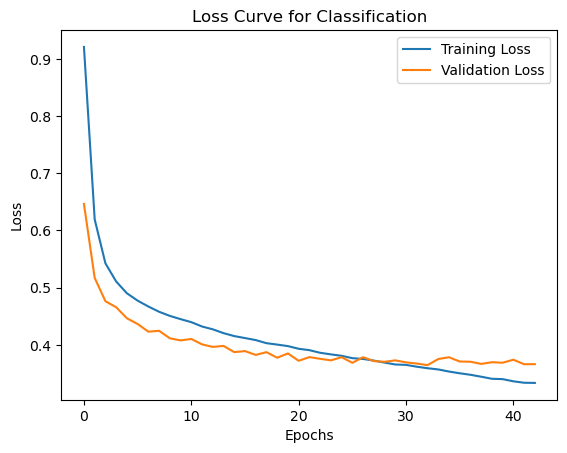

In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Step 1: Load the Dataset
data = pd.read_csv('winequality-red.csv', sep=';')

# Step 2: Preprocess the Data
X = data.drop('quality', axis=1)
y = data['quality']
y_class = pd.cut(y, bins=[0, 4, 6, 10], labels=[0, 1, 2]).astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y_class, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 3: Build and Train the Multi-Class Classification Model
model_class = keras.Sequential([
    layers.Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(3, activation='softmax')  # Output layer for multi-class classification
])

# Compile the model with a lower learning rate
model_class.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Implement EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history_class = model_class.fit(X_train, y_train, epochs=100, validation_split=0.2, callbacks=[early_stopping], verbose=0)

# Step 4: Evaluate the Model
y_pred_class = model_class.predict(X_test)

# Convert predictions to class labels
y_pred_class_labels = np.argmax(y_pred_class, axis=1)

# Calculate accuracy
accuracy_class = accuracy_score(y_test, y_pred_class_labels)
print(f'Accuracy on Test Set for Classification Model: {accuracy_class}')

# Optional: Plot the loss curve
plt.plot(history_class.history['loss'], label='Training Loss')
plt.plot(history_class.history['val_loss'], label='Validation Loss')
plt.title('Loss Curve for Classification')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
Accuracy on Test Set for Classification Model: 0.8313

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.00      0.00      0.00        11
     Class 1       0.85      0.97      0.90       262
     Class 2       0.59      0.28      0.38        47

    accuracy                           0.83       320
   macro avg       0.48      0.41      0.43       320
weighted avg       0.78      0.83      0.80       320


Confusion Matrix:
[[  0  11   0]
 [  0 253   9]
 [  0  34  13]]


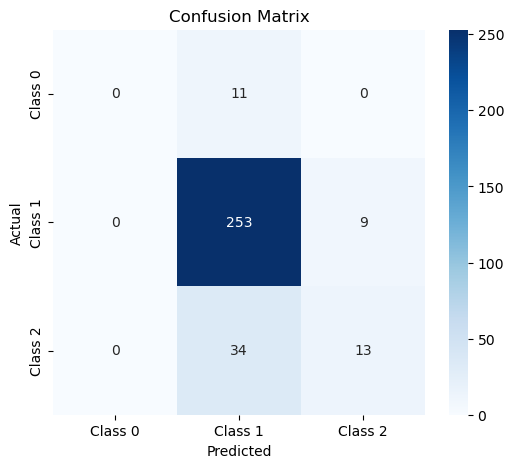

In [129]:
from sklearn.metrics import classification_report, confusion_matrix

# Step 4: Evaluate the Model
y_pred_class = model_class.predict(X_test)

# Convert predictions to class labels
y_pred_class_labels = np.argmax(y_pred_class, axis=1)

# Calculate accuracy
accuracy_class = accuracy_score(y_test, y_pred_class_labels)
print(f'Accuracy on Test Set for Classification Model: {accuracy_class:.4f}')

# Generate classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_class_labels, target_names=['Class 0', 'Class 1', 'Class 2'], zero_division=0))

# Generate confusion matrix
print("\nConfusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred_class_labels)
print(conf_matrix)

# Visualize the confusion matrix (optional)
import seaborn as sns
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1', 'Class 2'], yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
